In [16]:
import random
from os import listdir
from PIL import Image as PImage
from PIL import ImageOps
import numpy as np

random.seed(1337)

def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(normalizer(np.array(ImageOps.grayscale(img)))) # Flatten image to greyscale for simplicity sake
    return loadedImages
def loader(directory, label, app_list = []):
    new_list = app_list
    imgs = loadImages(directory)
    for i in imgs:
        new_list.append([i,label])
    return new_list
def shuffle_list(combined_list):
    random.shuffle(combined_list)
    labels = []
    data = []
    for i in combined_list:
        labels.append(i[1])
        data.append(i[0])
    return labels, data
def normalizer(img):
    return (img - img.mean()) / img.std()

In [17]:
import os
import shutil
import random

def get_file_list(input_dir):
    return [file for file in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, file))]

def get_random_files(file_list, N):
    return random.sample(file_list, N)

def copy_files(random_files, input_dir, output_dir):
    for file in random_files:
        shutil.copy(os.path.join(input_dir, file), output_dir)

def main(input_dir, output_dir, N):
    file_list = get_file_list(input_dir)
    random_files = get_random_files(file_list, N)
    copy_files(random_files, input_dir, output_dir)

In [ ]:
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target_trial\C2.1", 100)
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target_trial\C2.2", 100)
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target_trial\C7.1", 100)
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target_trial\C7.2", 100)
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target_trial\C7.3", 100)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time
import pickle

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
images = 0
images = loader("D:\CMSE202 Project\Target_trial\C2.1/", "C2.1")
images = loader("D:\CMSE202 Project\Target_trial\C2.2/", "C2.2", images)
images = loader("D:\CMSE202 Project\Target_trial\C7.1/", "C7.1", images)
images = loader("D:\CMSE202 Project\Target_trial\C7.2/", "C7.2", images)
images = loader("D:\CMSE202 Project\Target_trial\C7.3/", "C7.3", images)

In [19]:
labels, data = shuffle_list(images)
data=np.array(data)
data.shape

(500, 424, 424)

In [20]:
data_good = data.reshape(500,179776)
data_good.shape

(500, 179776)

In [21]:
np.array(images).shape

(500, 2)

In [22]:
np.array(data).shape

(500, 424, 424)

In [6]:
from ipywidgets import interact
def browse_images(images, labels):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray, interpolation='nearest')
        plt.title(labels[i])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

In [7]:
browse_images(data,labels)

interactive(children=(IntSlider(value=1249, description='i', max=2499), Output()), _dom_classes=('widget-inter…

In [25]:
train_vectors, test_vectors, train_labels, test_labels = train_test_split(data_good, labels, test_size = .25, train_size = .75)

In [26]:
train_vectors.shape

(375, 179776)

In [27]:
tmp_vectors = train_vectors
tmp_labels = train_labels

In [30]:
start = time.time()


print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4],
                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
clf = GridSearchCV(SVC(kernel='rbf',class_weight='balanced'), param_grid, n_jobs=-1)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
    

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Runtime 504.5711853504181


In [31]:
predict_vectors = test_vectors
true_labels = test_labels

In [32]:
print("Predicting people's names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels))

Predicting people's names on the test set
              precision    recall  f1-score   support

        C2.1       0.00      0.00      0.00        24
        C2.2       0.10      0.32      0.15        25
        C7.1       0.00      0.00      0.00        33
        C7.2       0.00      0.00      0.00        20
        C7.3       0.00      0.00      0.00        23

    accuracy                           0.06       125
   macro avg       0.02      0.06      0.03       125
weighted avg       0.02      0.06      0.03       125

[[ 0 20  3  0  1]
 [ 6  8  4  5  2]
 [ 6 22  0  3  2]
 [ 1 13  4  0  2]
 [ 2 16  2  3  0]]


#### Trying to find the best kernel by hand so it is faster

In [93]:
rerun_training = True
filename = 'galaxy_svm_model.p'

In [95]:
print("Fitting the classifier to the training set")
start = time.time()

if rerun_training:

    clf = svm.SVC(C=1000,kernel='poly',gamma=0.0005 ,class_weight='balanced')
    clf = clf.fit(tmp_vectors, tmp_labels)

    #save the model to a file
    pickle.dump(clf, open(filename, 'wb'))
    
else:
    #read the model from a file
    print("reading pickle file.")
    clf = pickle.load(open(filename, 'rb'))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Runtime 49.12766790390015


In [96]:
predict_vectors = test_vectors
true_labels = test_labels

In [97]:
print("Predicting people's names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels))

Predicting people's names on the test set
              precision    recall  f1-score   support

        C2.1       0.17      0.21      0.19        24
        C2.2       0.09      0.12      0.10        25
        C7.1       0.13      0.12      0.12        33
        C7.2       0.07      0.05      0.06        20
        C7.3       0.07      0.04      0.05        23

    accuracy                           0.11       125
   macro avg       0.10      0.11      0.10       125
weighted avg       0.11      0.11      0.11       125

[[ 5  9  7  1  2]
 [ 6  3  6  5  5]
 [10 12  4  4  3]
 [ 4  4  7  1  4]
 [ 5  6  7  4  1]]


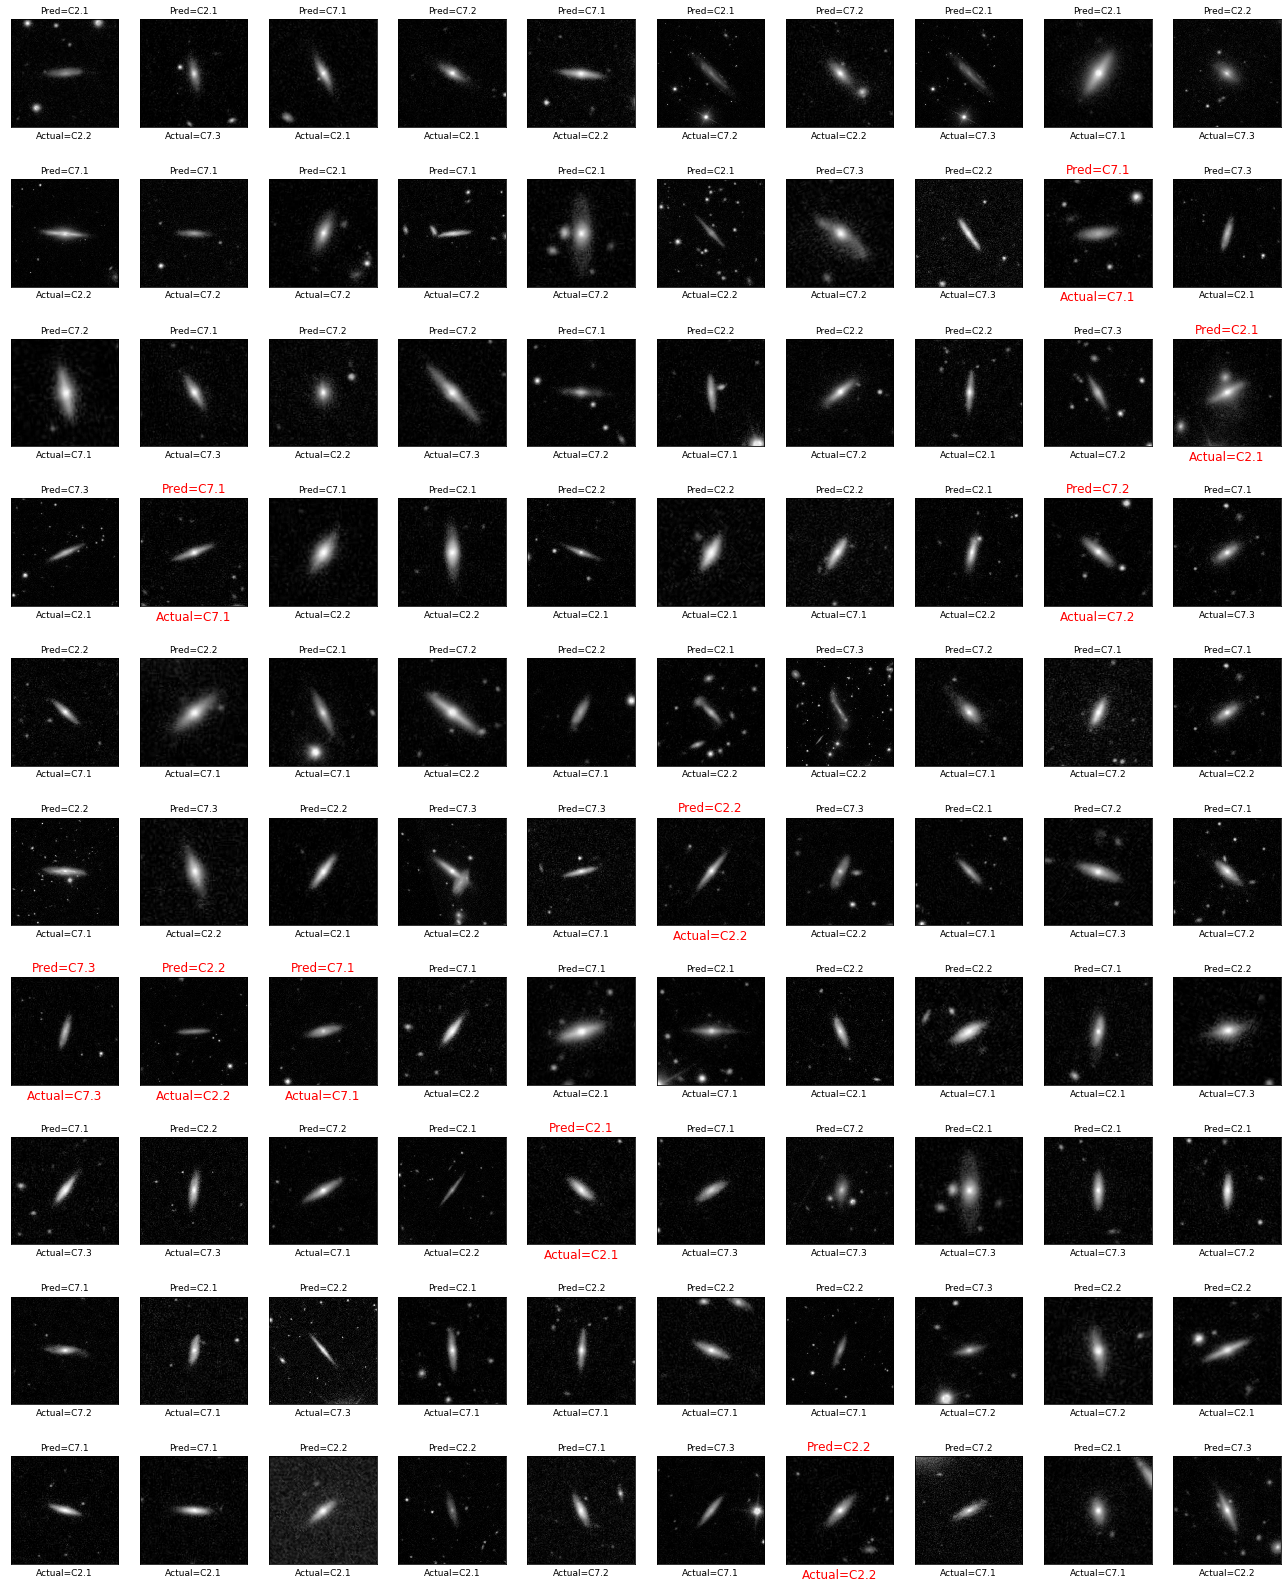

In [98]:
N,h,w = data.shape
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=10, n_col=10):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if pred_titles[i]==true_titles[i]:
            plt.title('Pred='+pred_titles[i],c="r", size=12)
            plt.xlabel('Actual='+true_titles[i],c="r", size=12)
        else:
            plt.title('Pred='+pred_titles[i], size=9)
            plt.xlabel('Actual='+true_titles[i], size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)

# PCA

In [1]:
import random
from os import listdir
from PIL import Image as PImage
from PIL import ImageOps
import numpy as np

random.seed(1337)

def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(normalizer(np.array(ImageOps.grayscale(img)))) # Flatten image to greyscale for simplicity sake
    return loadedImages
def loader(directory, label, app_list = []):
    new_list = app_list
    imgs = loadImages(directory)
    for i in imgs:
        new_list.append([i,label])
    return new_list
def shuffle_list(combined_list):
    random.shuffle(combined_list)
    labels = []
    data = []
    for i in combined_list:
        labels.append(i[1])
        data.append(i[0])
    return labels, data
def normalizer(img):
    return (img - img.mean()) / img.std()

import os
import shutil
import random

def get_file_list(input_dir):
    return [file for file in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, file))]

def get_random_files(file_list, N):
    return random.sample(file_list, N)

def copy_files(random_files, input_dir, output_dir):
    for file in random_files:
        shutil.copy(os.path.join(input_dir, file), output_dir)

def main(input_dir, output_dir, N):
    file_list = get_file_list(input_dir)
    random_files = get_random_files(file_list, N)
    copy_files(random_files, input_dir, output_dir)
    
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time
import pickle

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target\C2.1", 500)
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target\C2.2", 500)
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target\C7.1", 500)
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target\C7.2", 500)
main("D:\CMSE202 Project\Train\C2.1", "D:\CMSE202 Project\Target\C7.3", 500)

In [2]:
images = 0
images = loader("D:\CMSE202 Project\Target\C2.1/", "C2.1")
images = loader("D:\CMSE202 Project\Target\C2.2/", "C2.2", images)
images = loader("D:\CMSE202 Project\Target\C7.1/", "C7.1", images)
images = loader("D:\CMSE202 Project\Target\C7.2/", "C7.2", images)
images = loader("D:\CMSE202 Project\Target\C7.3/", "C7.3", images)

In [3]:
labels, data = shuffle_list(images)
data=np.array(data)
data.shape

(2500, 424, 424)

In [4]:
data_good = data.reshape(2500,179776)
data_good.shape

(2500, 179776)

In [8]:
browse_images(data,labels)

interactive(children=(IntSlider(value=1249, description='i', max=2499), Output()), _dom_classes=('widget-inter…

In [18]:
train_vectors, test_vectors, train_labels, test_labels = train_test_split(data_good, labels, test_size = .25, train_size = .75)

In [19]:
train_vectors.shape

(1875, 179776)

In [20]:
tmp_vectors = train_vectors
tmp_labels = train_labels

In [135]:
n_components = 250

print("Extracting the top %d eigenfaces from %d faces" % (n_components, train_vectors.shape[0]))

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components, whiten=True)

#Fit the training data to the pca model.
_ = pca.fit(train_vectors)

pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

Extracting the top 250 eigenfaces from 1875 faces


In [136]:
tmp_vectors = pca_train_vectors
tmp_labels = train_labels

In [23]:
start = time.time()

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4],
         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01],
         'kernel':['linear','rbf','poly','sigmoid']}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, n_jobs=-1)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
  
    
end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Runtime 59.48121237754822


In [137]:
rerun_training = True
filename = 'galaxy_pca_model.p'

In [138]:
print("Fitting the classifier to the training set")
start = time.time()

if rerun_training:

    clf = svm.SVC(C=10000,kernel='sigmoid',gamma=0.01 ,class_weight='balanced')
    clf = clf.fit(tmp_vectors, tmp_labels)

    #save the model to a file
    pickle.dump(clf, open(filename, 'wb'))
    
else:
    #read the model from a file
    print("reading pickle file.")
    clf = pickle.load(open(filename, 'rb'))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Runtime 1.3555657863616943


In [139]:
predict_vectors = pca_test_vectors
true_labels = test_labels

In [140]:
print("Predicting people's names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels))

Predicting people's names on the test set
              precision    recall  f1-score   support

        C2.1       0.24      0.28      0.26       121
        C2.2       0.27      0.26      0.27       125
        C7.1       0.30      0.34      0.32       129
        C7.2       0.28      0.27      0.28       130
        C7.3       0.22      0.16      0.19       120

    accuracy                           0.26       625
   macro avg       0.26      0.26      0.26       625
weighted avg       0.26      0.26      0.26       625

[[34 21 27 20 19]
 [27 33 24 21 20]
 [28 24 44 19 14]
 [27 25 30 35 13]
 [27 21 24 29 19]]


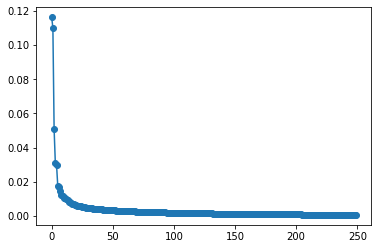

In [141]:
plt.plot(pca.explained_variance_ratio_, marker="o")

In [142]:
total_variance = np.sum(pca.explained_variance_ratio_)*100
print("These %d eigenvectors account for a total of %d percent of the total variance in the original dataset"
      % (n_components, total_variance))


These 250 eigenvectors account for a total of 91 percent of the total variance in the original dataset


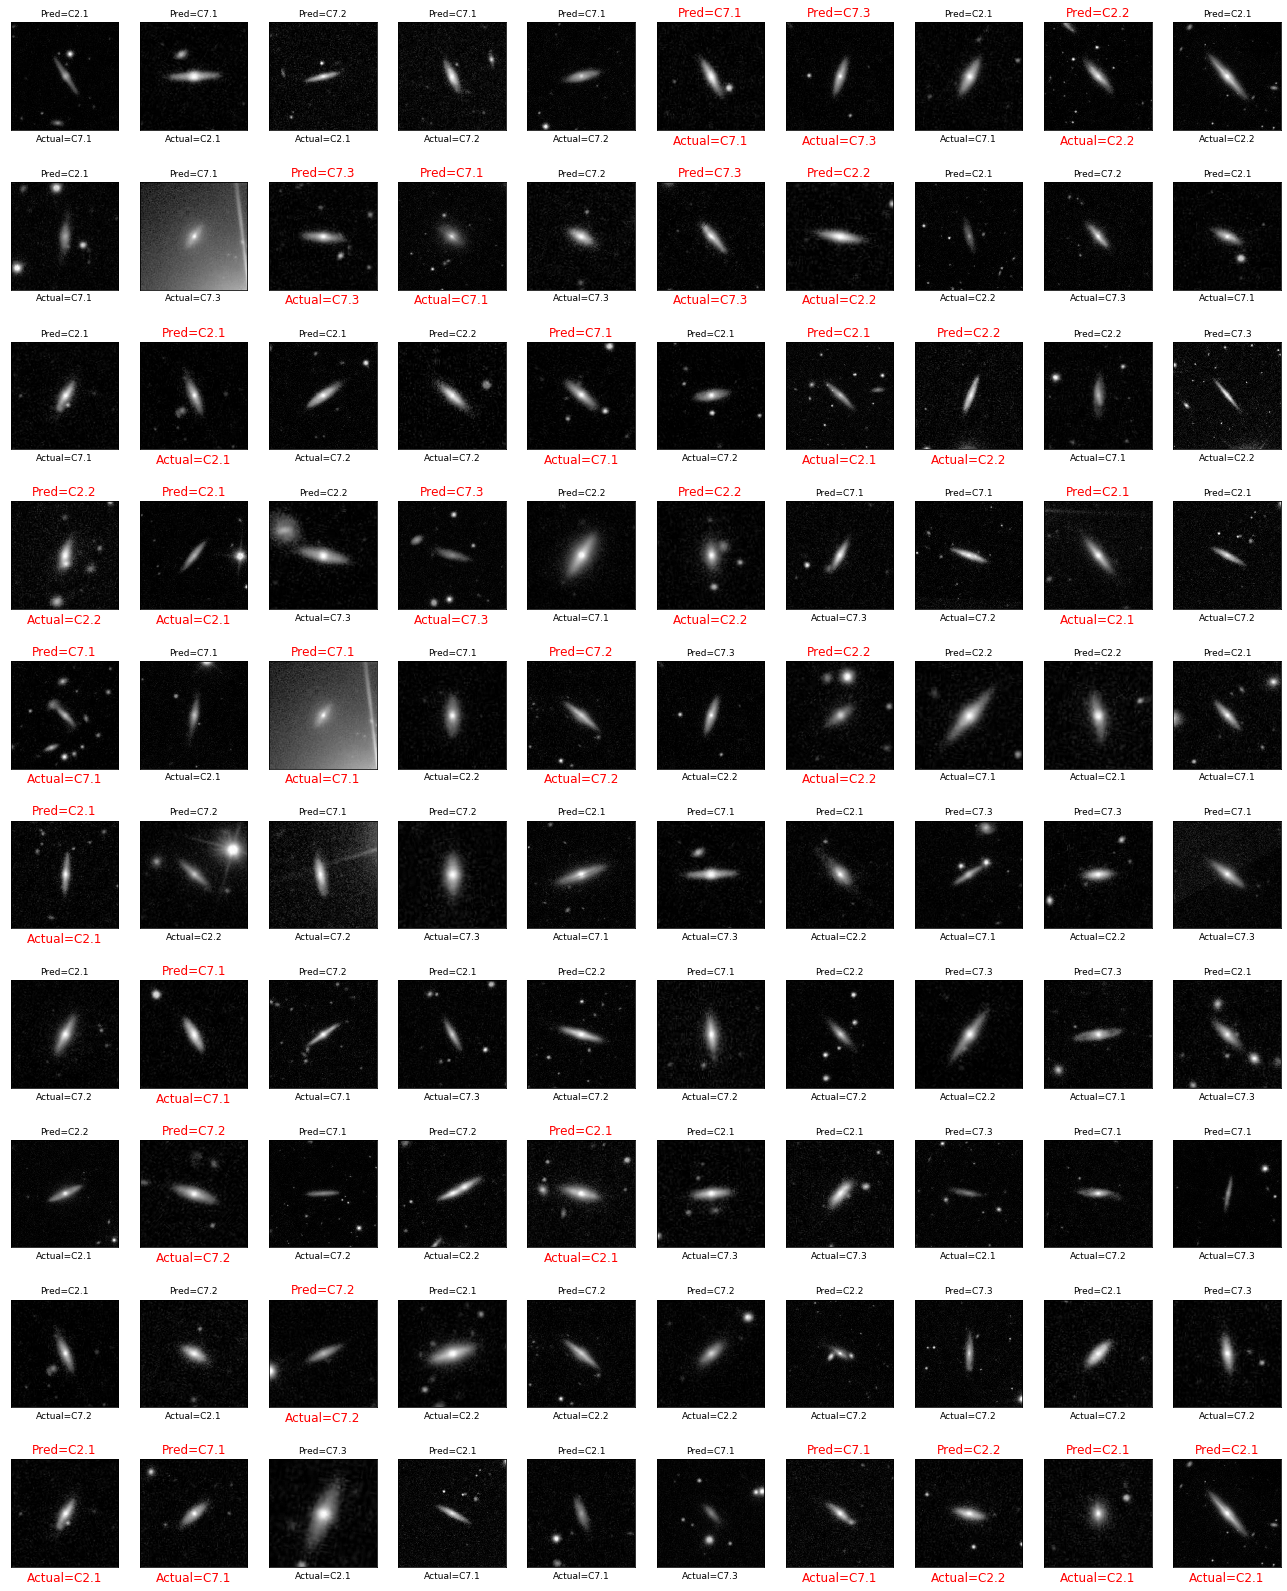

In [143]:
N,h,w = data.shape
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=10, n_col=10):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if pred_titles[i]==true_titles[i]:
            plt.title('Pred='+pred_titles[i],c="r", size=12)
            plt.xlabel('Actual='+true_titles[i],c="r", size=12)
        else:
            plt.title('Pred='+pred_titles[i], size=9)
            plt.xlabel('Actual='+true_titles[i], size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)